In [ ]:
import cv2
import numpy as np
import os
import yaml
from yaml.loader import SafeLoader

# Load the YAML file
with open('/content/drive/MyDrive/Yolo Training /yolov5/Tumor_data/tumor.yaml', mode='r') as f:
    data_yaml = yaml.load(f, Loader=SafeLoader)

labels = data_yaml['names']
print(labels)


['NO_tumor', 'glioma', 'meningioma', 'pituitary', 'space-occupying lesion-']


(1, 25200, 10)
4
meningioma: 96%
glioma: 94%
pituitary: 91%
NO_tumor: 87%


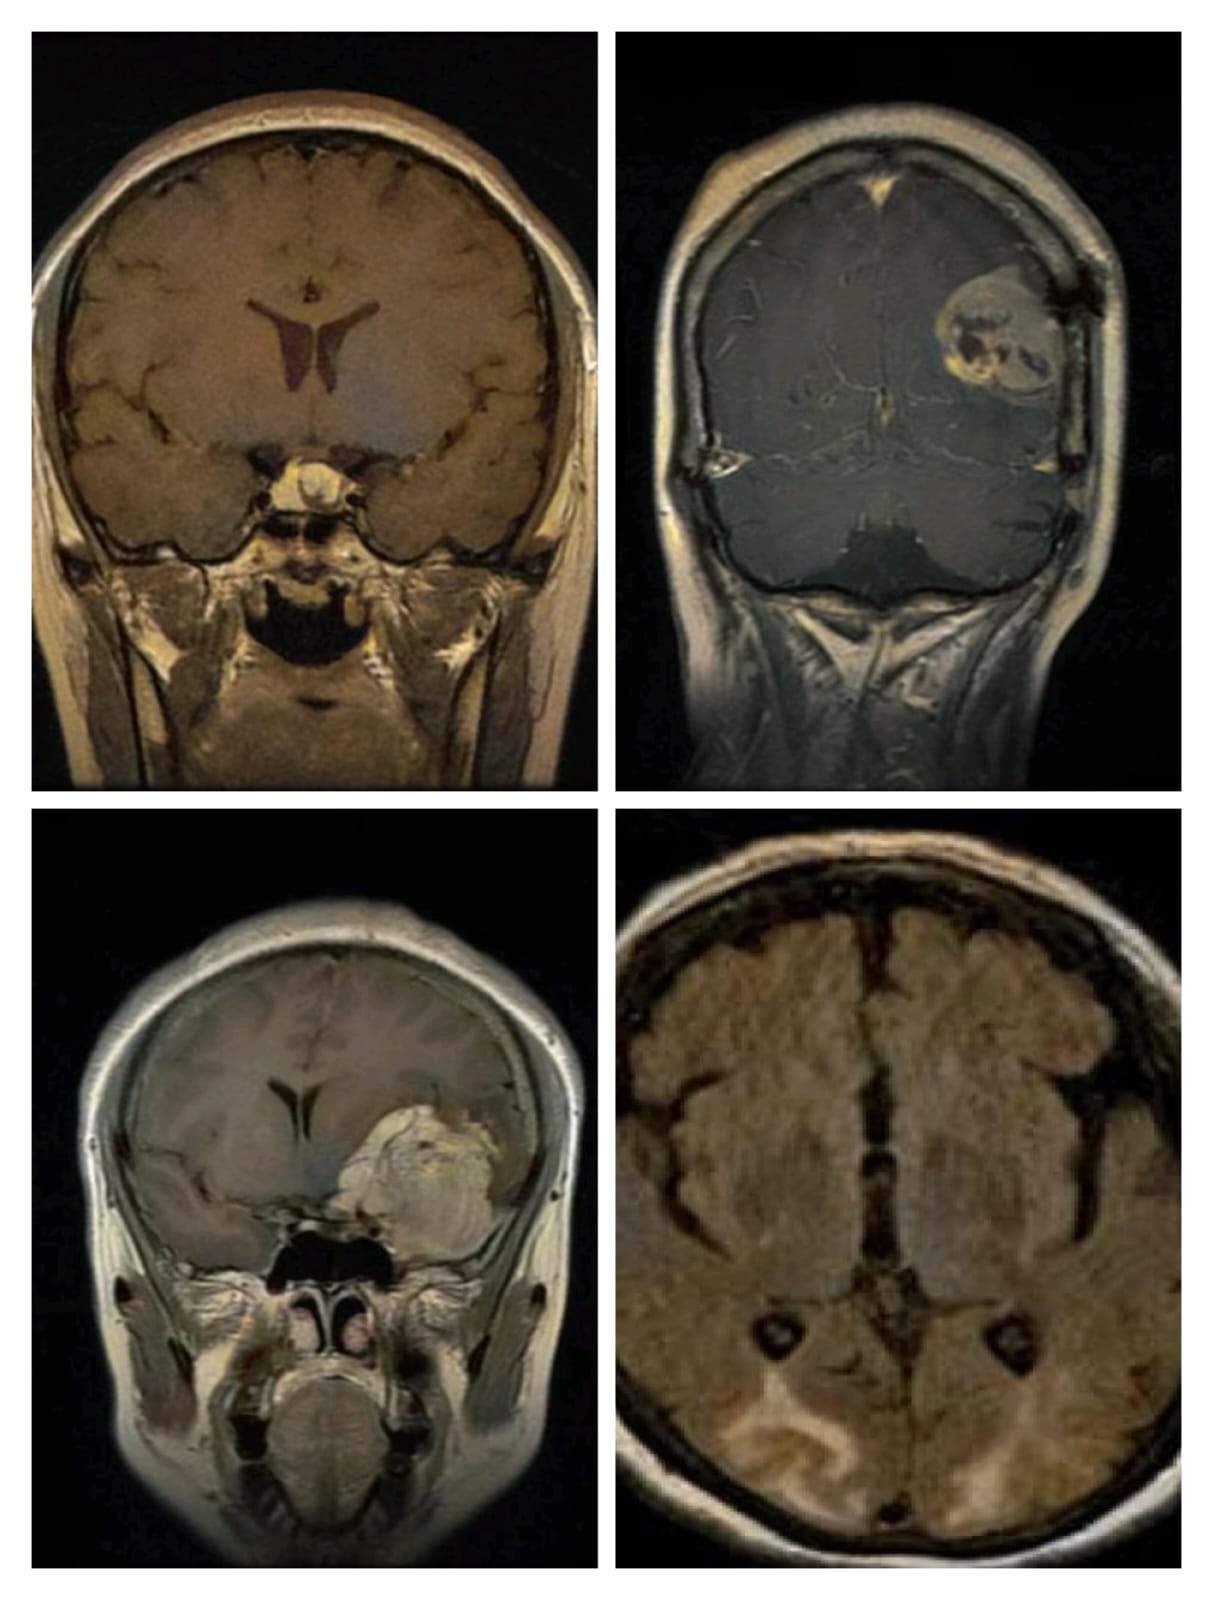

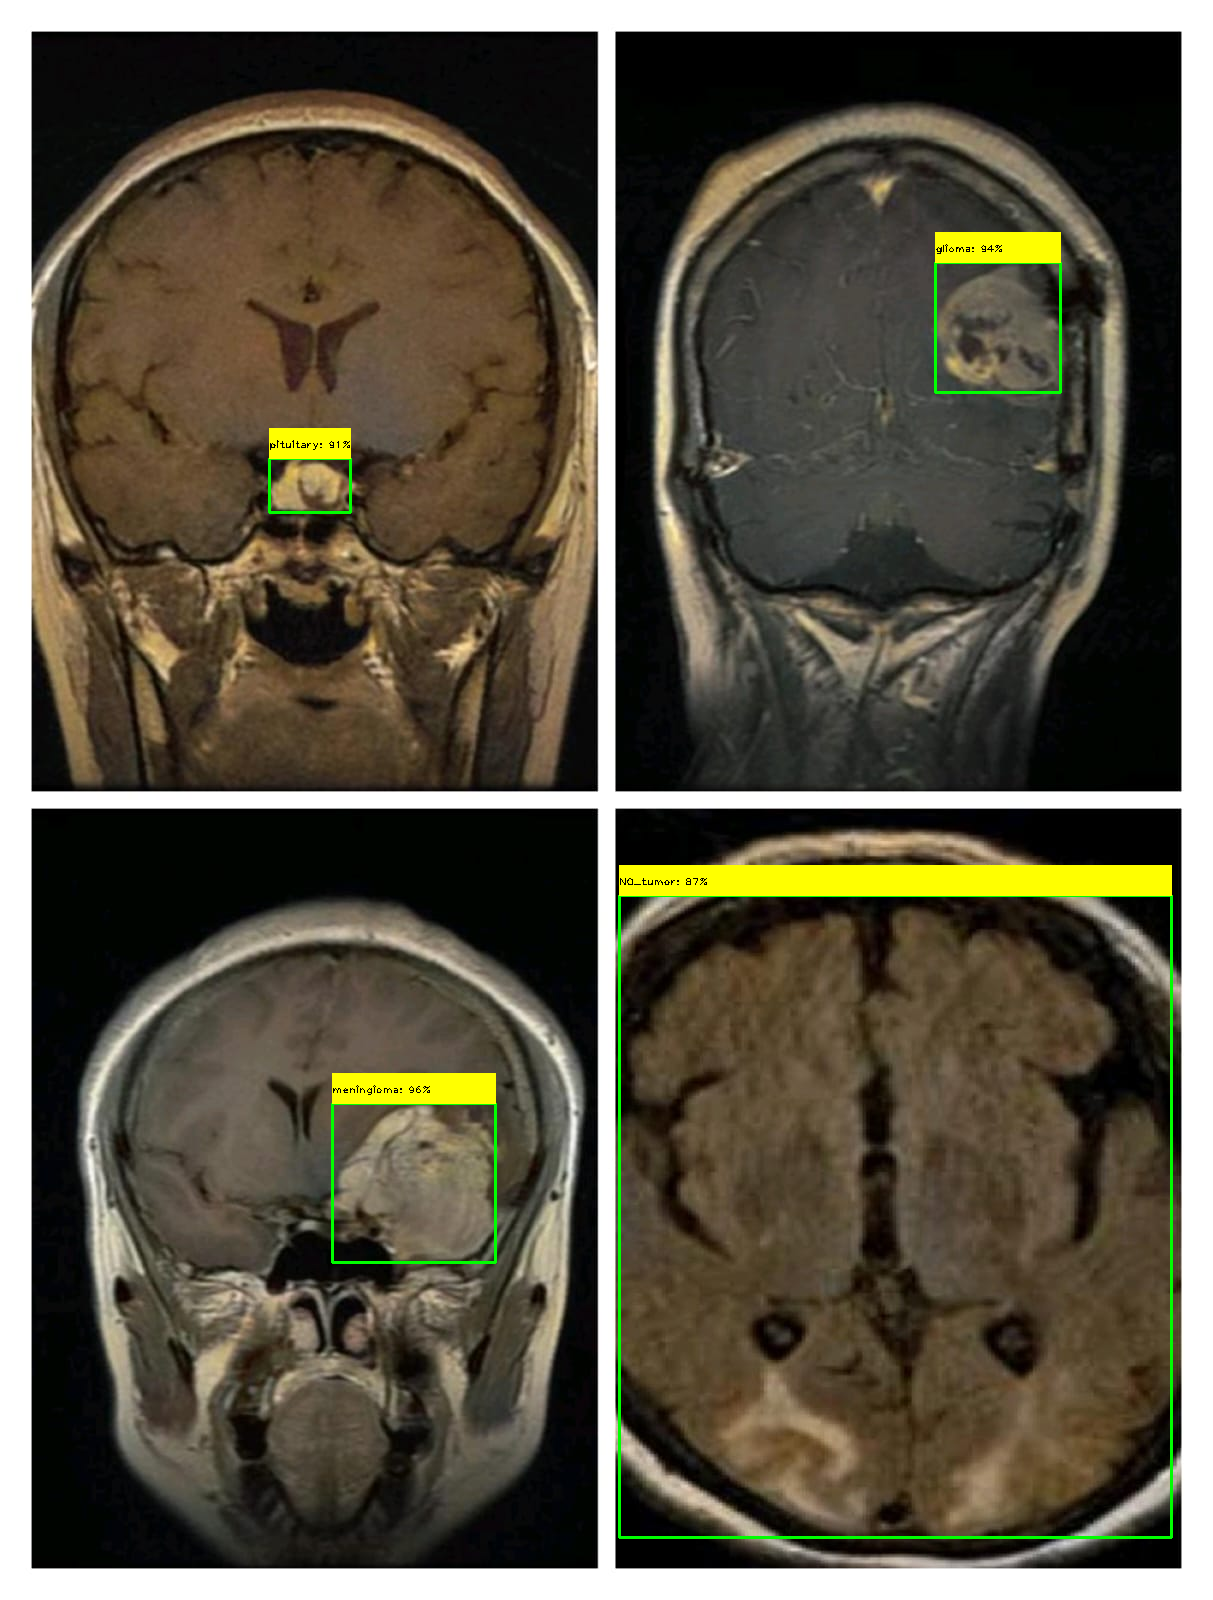

In [ ]:

# Load the YOLO model
yolo = cv2.dnn.readNetFromONNX('/content/drive/MyDrive/Yolo Training /yolov5/runs/train/Model3/weights/best.onnx')
yolo.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
yolo.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load the image
img = cv2.imread('/content/drive/MyDrive/Yolo Training /yolov5/Tumor_data/Brain3.jpeg')
image = img.copy()
row, col, d = image.shape

# Convert image to a square image (array)
max_rc = max(row, col)
input_image = np.zeros((max_rc, max_rc, 3), dtype=np.uint8)
input_image[0:row, 0:col] = image

# Prepare the image for YOLO and get the prediction
INPUT_WH_YOLO = 640
blob = cv2.dnn.blobFromImage(input_image, 1/255, (INPUT_WH_YOLO, INPUT_WH_YOLO), swapRB=True, crop=False)
yolo.setInput(blob)
preds = yolo.forward()  # Detection or prediction from YOLO

print(preds.shape)

# Non-Maximum Suppression (NMS)
# Step-1: Filter detections based on confidence (0.4) and probability score (0.25)
detections = preds[0]
boxes = []
confidences = []
classes = []

# Get width and height of the input image
image_w, image_h = input_image.shape[:2]
x_factor = image_w / INPUT_WH_YOLO
y_factor = image_h / INPUT_WH_YOLO

for i in range(len(detections)):
    row = detections[i]
    confidence = row[4]  # Confidence of detecting an object
    if confidence > 0.4:
        class_score = row[5:].max()  # Maximum probability of the object
        class_id = row[5:].argmax()  # Get index position of max probability

        if class_score > 0.25:
            cx, cy, w, h = row[0:4]
            # Construct bounding box from four values: left, top, width, and height
            left = int((cx - 0.5 * w) * x_factor)
            top = int((cy - 0.5 * h) * y_factor)
            width = int(w * x_factor)
            height = int(h * y_factor)

            box = np.array([left, top, width, height])

            # Append values to lists
            confidences.append(confidence)
            boxes.append(box)
            classes.append(class_id)

# Convert to arrays for NMS
boxes_np = np.array(boxes).tolist()
confidences_np = np.array(confidences).tolist()

# Apply Non-Maximum Suppression
index = cv2.dnn.NMSBoxes(boxes_np, confidences_np, 0.25, 0.45).flatten()

# Print the number of objects detected after NMS
print(len(index))

# Draw the bounding boxes on the image
for ind in index:
    # Extract bounding box
    x, y, w, h = boxes_np[ind]
    bb_conf = int(confidences_np[ind] * 100)
    classes_id = classes[ind]
    class_name = labels[classes_id]

    text = f'{class_name}: {bb_conf}%'
    print(text)

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image, (x, y - 30), (x + w, y), (0, 255, 255), -1)

    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 0.7, (0, 0, 0), 1)

# Display the original and YOLO predicted images
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(image)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

(1, 25200, 10)
4
meningioma: 93%
glioma: 92%
NO_tumor: 81%
pituitary: 79%


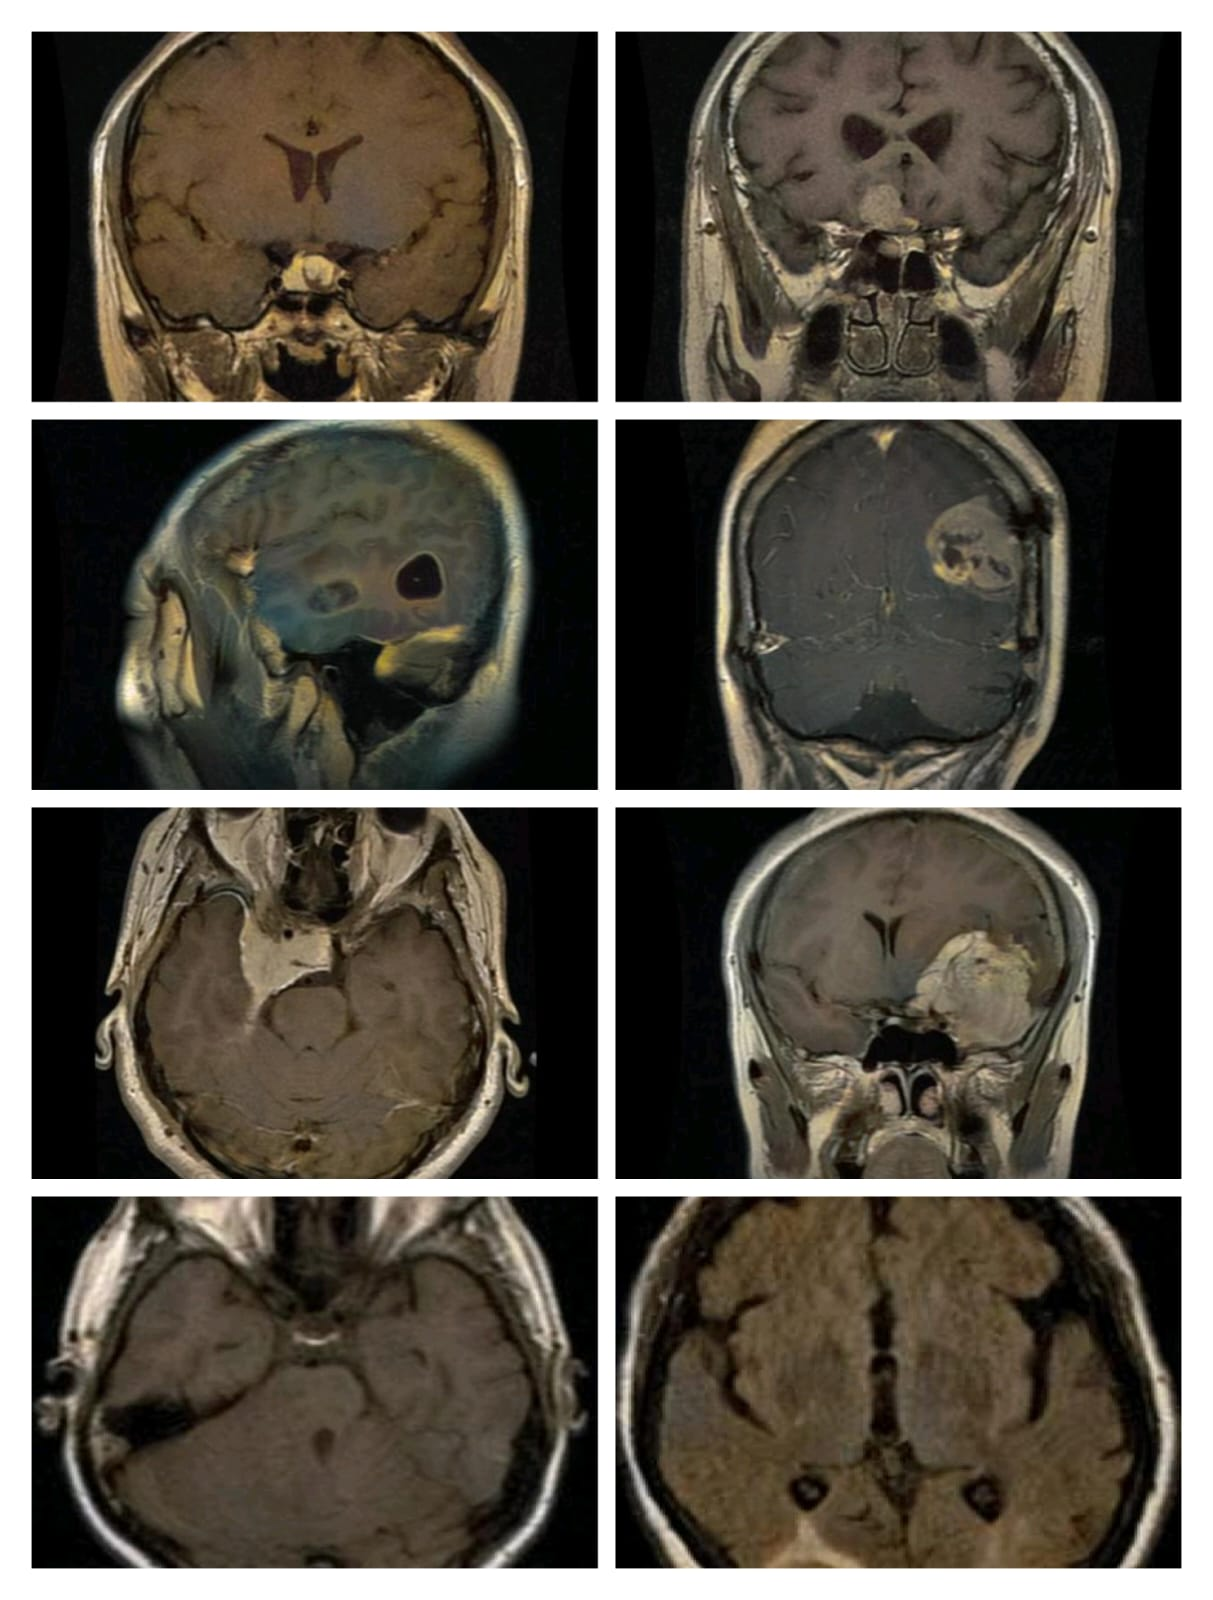

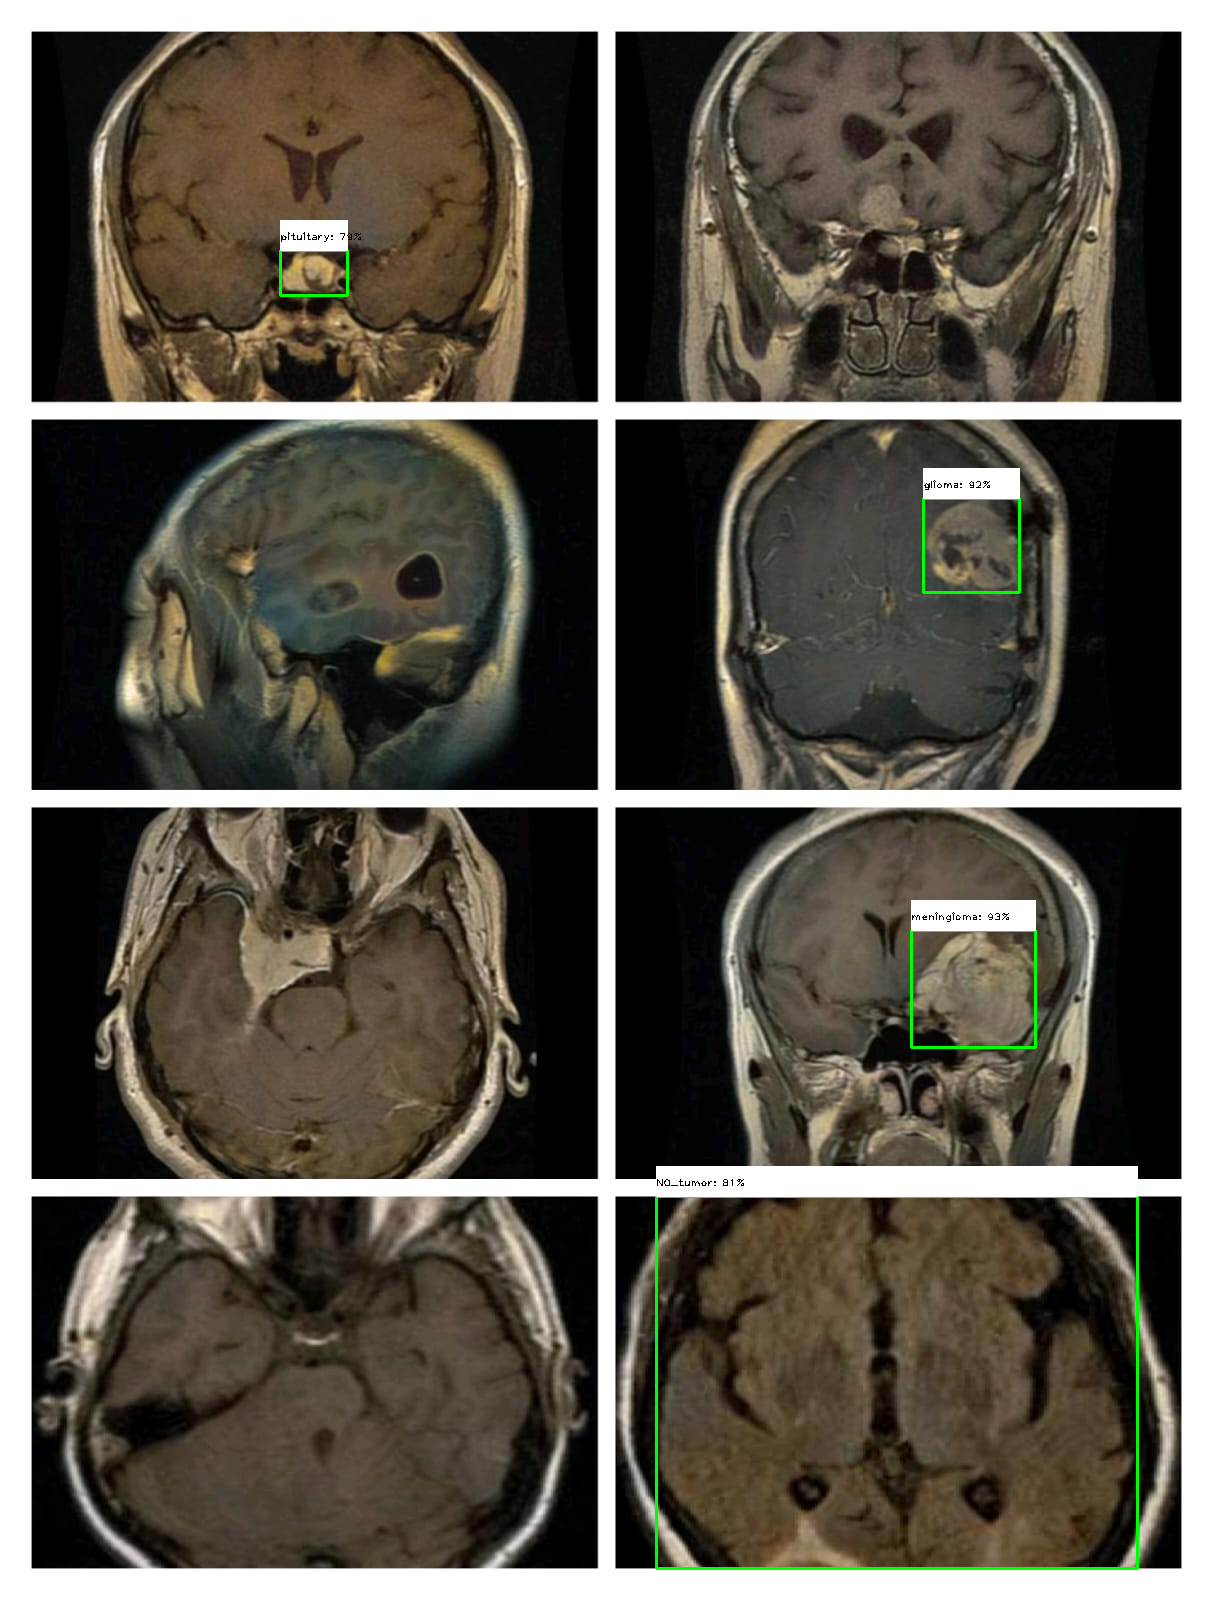

In [ ]:
import cv2
import numpy as np
import yaml
from yaml.loader import SafeLoader
from google.colab.patches import cv2_imshow  # Colab-specific function

# Define the 5 classes for object detection
labels = ['NO_tumor', 'glioma', 'meningioma', 'pituitary', 'space-occupying lesion']

# Load the YOLO model
yolo = cv2.dnn.readNetFromONNX('/content/drive/MyDrive/Yolo Training /yolov5/runs/train/Model3/weights/best.onnx')
yolo.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
yolo.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load the image
img = cv2.imread('/content/drive/MyDrive/Yolo Training /yolov5/Tumor_data/WhatsApp Image 2024-10-22 at 15.02.23.jpeg')
image = img.copy()
row, col, d = image.shape

# Convert the image to a square image (array)
max_rc = max(row, col)
input_image = np.zeros((max_rc, max_rc, 3), dtype=np.uint8)
input_image[0:row, 0:col] = image

# Prepare the image for YOLO and get the prediction
INPUT_WH_YOLO = 640
blob = cv2.dnn.blobFromImage(input_image, 1/255, (INPUT_WH_YOLO, INPUT_WH_YOLO), swapRB=True, crop=False)
yolo.setInput(blob)
preds = yolo.forward()  # Detection or prediction from YOLO

print(preds.shape)

# Non-Maximum Suppression (NMS)
# Step-1: Filter detections based on confidence (0.4) and probability score (0.25)
detections = preds[0]
boxes = []
confidences = []
classes = []

# Get width and height of the input image
image_w, image_h = input_image.shape[:2]
x_factor = image_w / INPUT_WH_YOLO
y_factor = image_h / INPUT_WH_YOLO

for i in range(len(detections)):
    row = detections[i]
    confidence = row[4]  # Confidence of detecting an object
    if confidence > 0.2:
        class_score = row[5:].max()  # Maximum probability of the object
        class_id = row[5:].argmax()  # Get index position of max probability

        if class_score > 0.25:
            cx, cy, w, h = row[0:4]
            # Construct bounding box from four values: left, top, width, and height
            left = int((cx - 0.5 * w) * x_factor)
            top = int((cy - 0.5 * h) * y_factor)
            width = int(w * x_factor)
            height = int(h * y_factor)

            box = np.array([left, top, width, height])

            # Append values to lists
            confidences.append(confidence)
            boxes.append(box)
            classes.append(class_id)

# Convert to arrays for NMS
boxes_np = np.array(boxes).tolist()
confidences_np = np.array(confidences).tolist()

# Apply Non-Maximum Suppression
index = cv2.dnn.NMSBoxes(boxes_np, confidences_np, 0.25, 0.45).flatten()

# Print the number of objects detected after NMS
print(len(index))

# Draw the bounding boxes on the image
for ind in index:
    # Extract bounding box
    x, y, w, h = boxes_np[ind]
    bb_conf = int(confidences_np[ind] * 100)
    classes_id = classes[ind]
    class_name = labels[classes_id]

    text = f'{class_name}: {bb_conf}%'
    print(text)

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image, (x, y - 30), (x + w, y), (255, 255, 255), -1)

    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 0.7, (0, 0, 0), 1)

# Display the original and YOLO predicted images using cv2_imshow
cv2_imshow(img)
cv2_imshow(image)
